# PROJECT : Telco Customer Churn
**Context** : A company needs to analyze all the relevant customer data and develop focused customer retention program

**Goal** : Predict customer's behaviour to retain customer


# READ DATA

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
 path = '/content/WA_Fn-UseC_-Telco-Customer-Churn.csv'

 with open(path, 'r') as f:
   tel_customer = pd.read_csv(f)


In [ ]:
#tel_customer = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn (1).csv")

# EDA

In [ ]:
pd.set_option('display.max_columns', None)
tel_customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
tel_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
tel_customer.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
tel_customer.describe(include="object").T

,count,unique,top,freq
customerID,7043,7043,3186-AJIEK,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
tel_customer.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
temp = tel_customer['TotalCharges'][pd.to_numeric(tel_customer['TotalCharges'], errors = 'coerce').isna()].iloc[0]
print('a')
print(temp + 'a')

a
 a


In [ ]:
#Identify 11 ' ' in Total Charges
tel_customer['TotalCharges'][tel_customer['TotalCharges'] == ' ']

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [ ]:
tel_customer = tel_customer.loc[tel_customer['TotalCharges'] != ' '].reset_index(drop=True)
# temp = tel_customer.drop(tel_customer[tel_customer['TotalCharges'] == ' '].index)
tel_customer['TotalCharges'] = pd.to_numeric(tel_customer['TotalCharges'], errors = 'coerce')

In [ ]:
tel_customer.duplicated().sum()

np.int64(0)

Check outliers

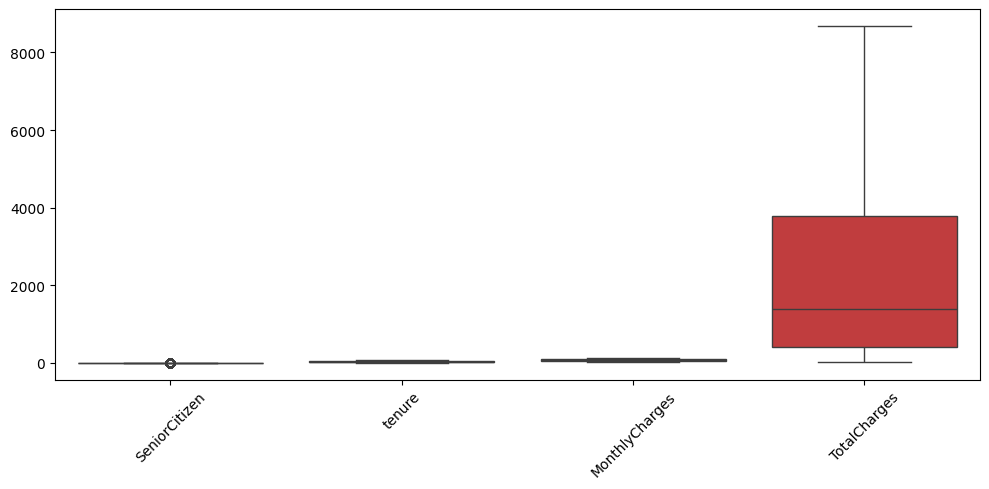

In [ ]:
plt.figure(figsize =(10,5))
sns.boxplot(data = tel_customer)
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

Distribution of columns

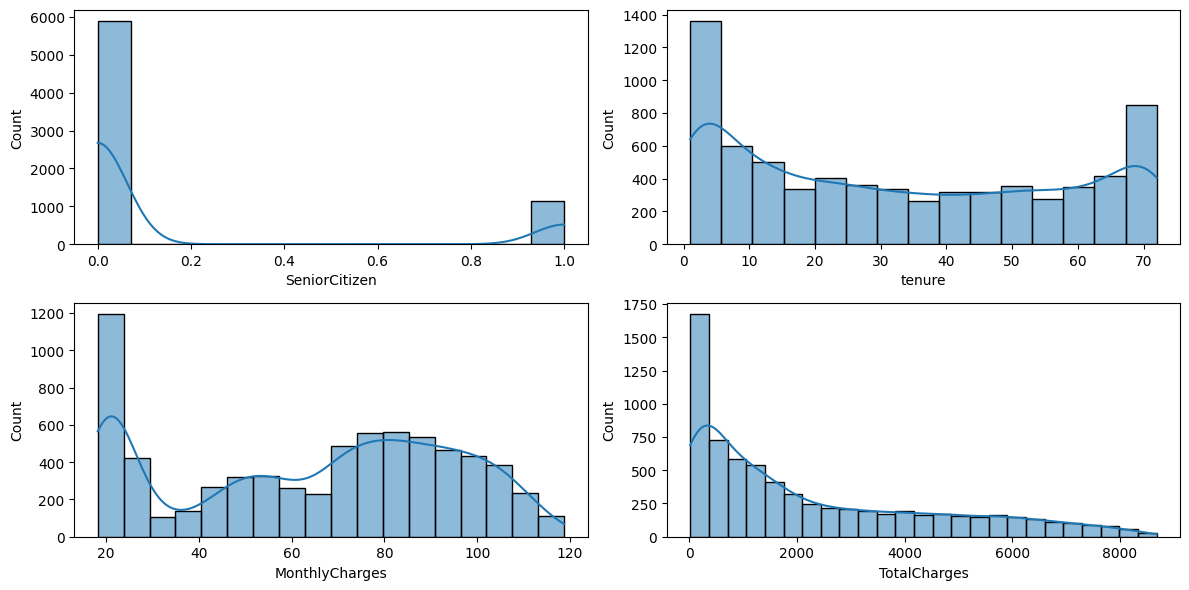

In [ ]:
# Numeric columns :
numeric_cols = ['SeniorCitizen','tenure', 'MonthlyCharges', 'TotalCharges']
fig,axes = plt.subplots(2,2, figsize = (12,6))
for i,c in enumerate(numeric_cols):
  row,col_index = divmod(i,2)
  sns.histplot(data = tel_customer, x = c, ax = axes[row,col_index],kde = True)
plt.tight_layout()
plt.show()


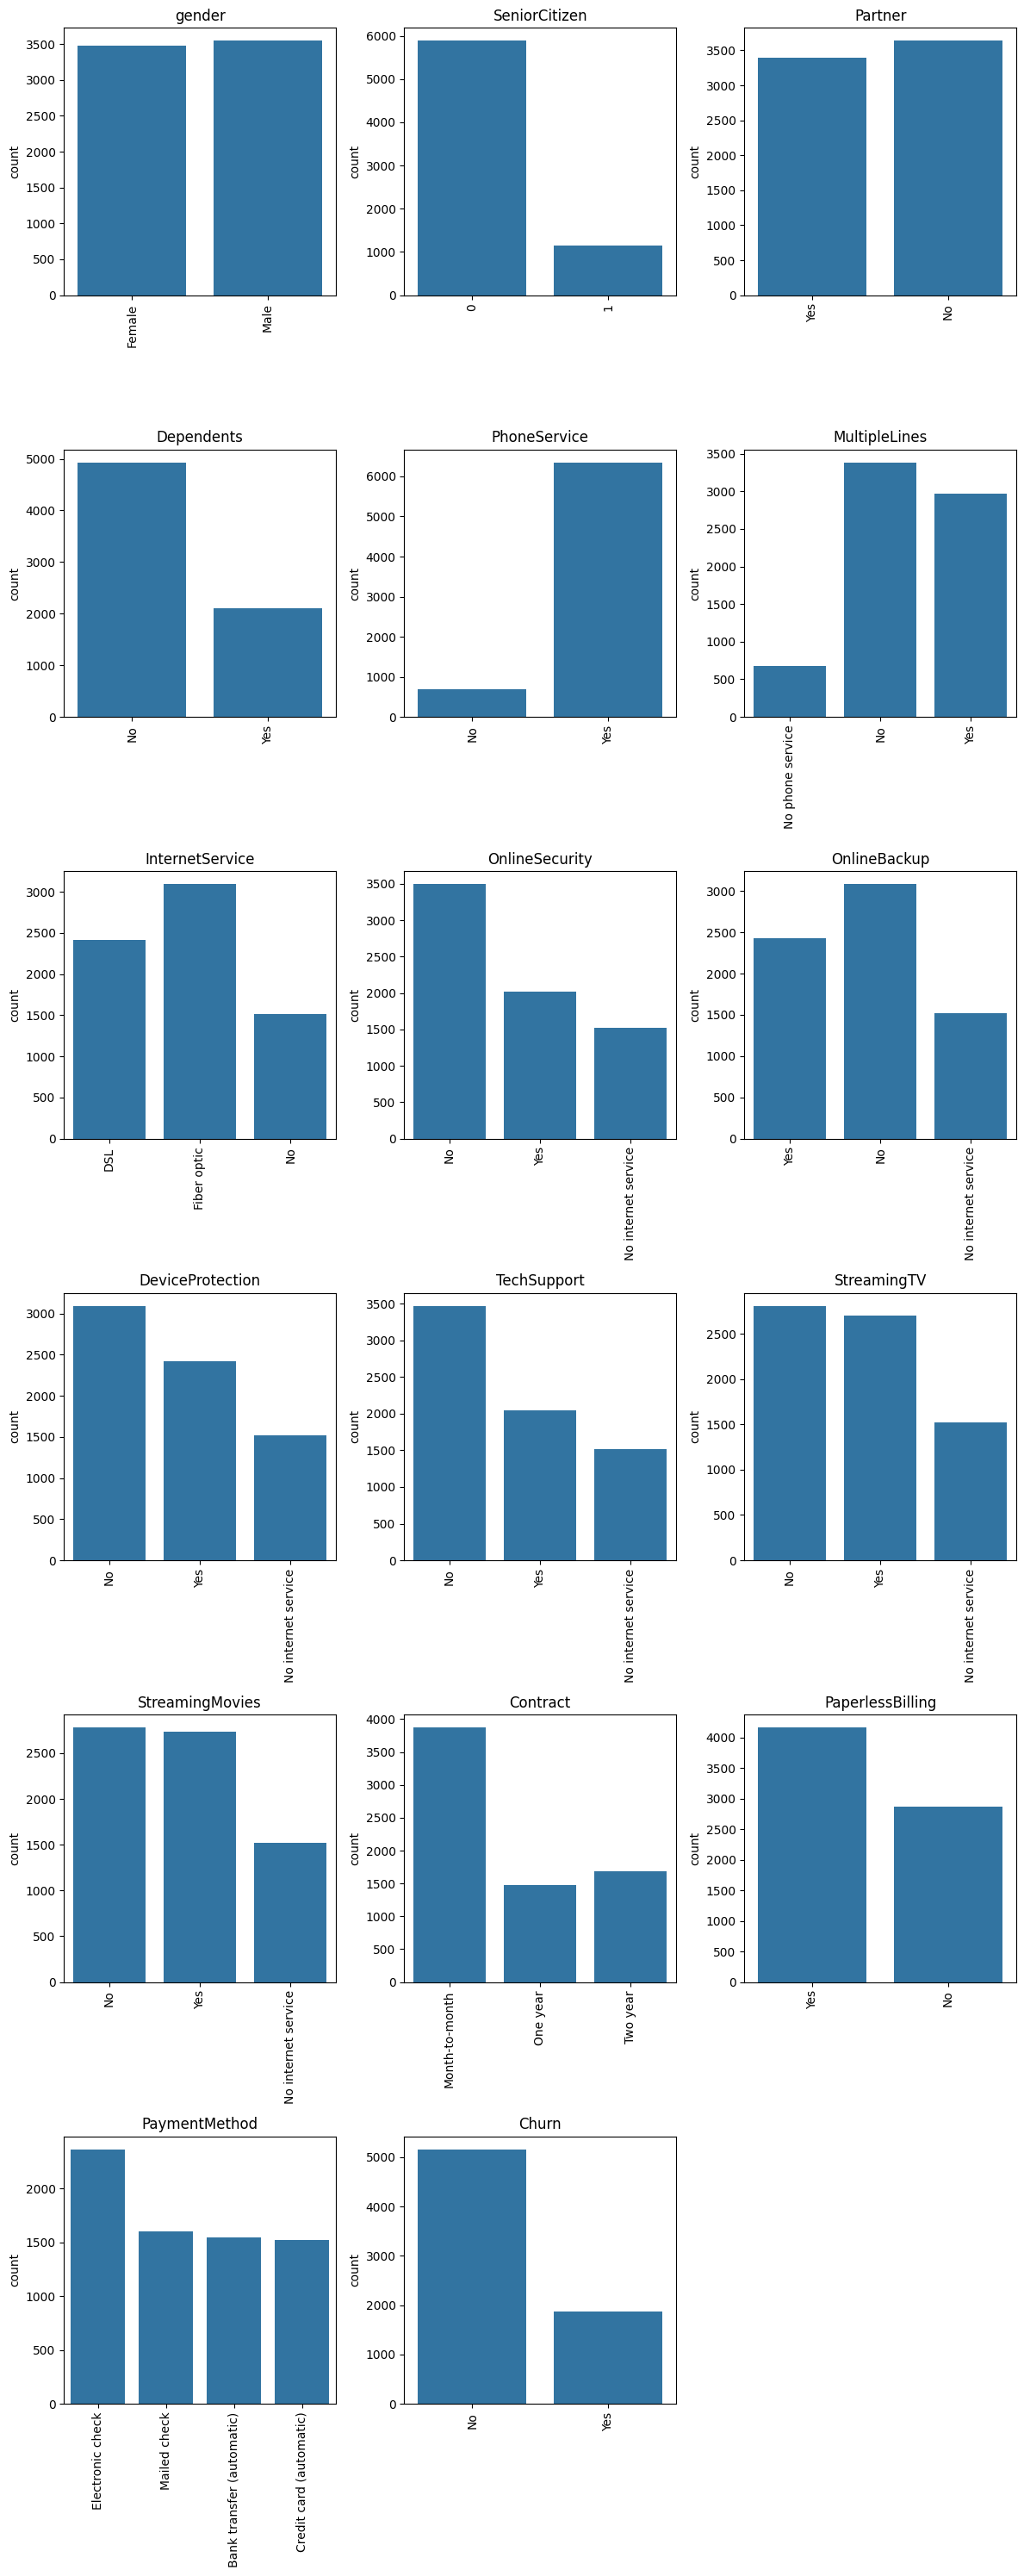

In [ ]:
#categorical_columns:
# Columns with more than 10 values could cause confusion
max_unique = 10
#Idetify categorical columns with less than 10 unique values and num_rows and num_cols for axes
categorical_cols = [col for col in tel_customer.columns if tel_customer[col].nunique() < max_unique]
num_plots = len(categorical_cols)
num_cols = 3
num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))

#Draw distribution of each col
for i, col in enumerate(categorical_cols):
    row, col_index = divmod(i, num_cols)
    sns.countplot(data=tel_customer, x=col, ax=axes[row, col_index])
    axes[row, col_index].tick_params(axis='x', rotation=90)
    axes[row, col_index].set_title(f"{col}")
    axes[row, col_index].set_xlabel("")
#Delete the redunctdant axes if exited
for j in range(i + 1, num_rows * num_cols):
    row, col_index = divmod(j, num_cols)
    fig.delaxes(axes[row, col_index])
plt.tight_layout()
plt.show()

Investigate about correlation

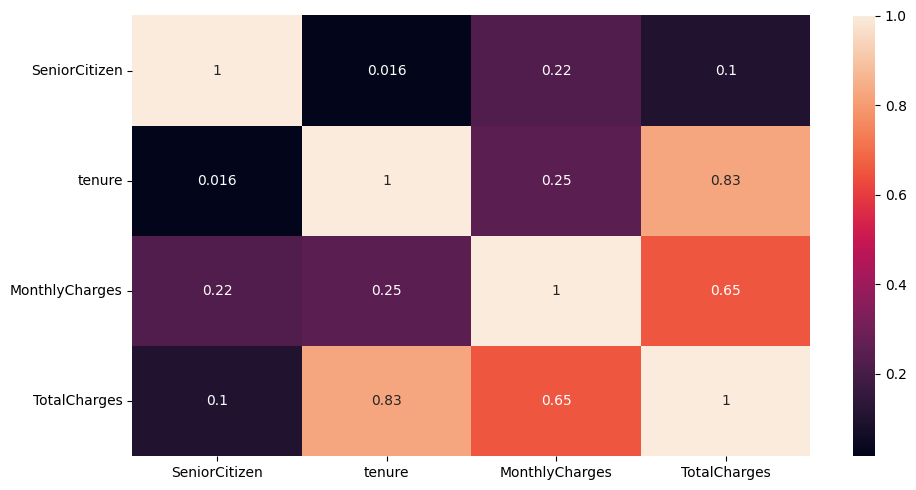

In [ ]:
#numeric columns

plt.figure(figsize =(10,5))
sns.heatmap(tel_customer[numeric_cols].corr(), annot = True)
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(tel_customer[['MonthlyCharges','TotalCharges']].values, i) for i in range(tel_customer[['tenure','TotalCharges']].shape[1])]
vif["features"] = tel_customer[['MonthlyCharges','TotalCharges']].columns
vif

,VIF Factor,features
0,3.336953,MonthlyCharges
1,3.336953,TotalCharges


In [ ]:
vif_2 = pd.DataFrame()
vif_2["VIF Factor"] = [variance_inflation_factor(tel_customer[['tenure','TotalCharges']].values, i) for i in range(tel_customer[['tenure','TotalCharges']].shape[1])]
vif_2["features"] = tel_customer[['tenure','TotalCharges']].columns
vif

,VIF Factor,features
0,3.336953,MonthlyCharges
1,3.336953,TotalCharges


#PREPROCESSING

In [ ]:
#Encoding target
tel_customer['Churn'] = tel_customer['Churn'].map({'Yes':1,'No':0})

Split variables and target

In [ ]:
tel_customer_data = tel_customer.drop(['Churn','customerID'],axis =1)
tel_customer_target = tel_customer['Churn']

In [ ]:
# ordinal_cols , Xác định cột ordinal duy nhất là Contract
ordinal_cols = ['Contract']

#Other norminal cols
norminal_cols = [c for c in categorical_cols if c not in ordinal_cols + ['Churn']]

#Numeric cols
Numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

#Encode
ordinal_encoder = OrdinalEncoder(categories = [['Month-to-month', 'One year', 'Two year']])
norminal_encoder = OneHotEncoder(drop = 'first',handle_unknown='ignore', sparse_output=False)

#transform columns
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', ordinal_encoder, ordinal_cols),
        ('norminal', norminal_encoder, norminal_cols)
    ])
X = preprocessor.fit_transform(tel_customer_data)

Train - Test- Split

In [ ]:
X_data_encoded = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())
X_data_encoded= pd.concat([X_data_encoded, tel_customer_data[Numeric_cols]],axis =1)

In [ ]:
X_data_encoded['TotalCharges'].isna().sum()

np.int64(0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data_encoded, tel_customer_target, test_size=0.2, random_state=42)

In [ ]:
num_encoder = MinMaxScaler()

#Transfrom column
X_train[Numeric_cols] = num_encoder.fit_transform(X_train[Numeric_cols])
X_test[Numeric_cols] = num_encoder.transform(X_test[Numeric_cols])

In [ ]:
X_train.isna().sum()

,0
ordinal__Contract,0
norminal__gender_Male,0
norminal__SeniorCitizen_1,0
norminal__Partner_Yes,0
norminal__Dependents_Yes,0
norminal__PhoneService_Yes,0
norminal__MultipleLines_No phone service,0
norminal__MultipleLines_Yes,0
norminal__InternetService_Fiber optic,0
norminal__InternetService_No,0


In [ ]:
X_train.shape

(5625, 29)

Đã chuẩn bị xong X_train, X_test, Y_Train, Y_test (đã chuẩn hóa)

#Classfication

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    average_precision_score
)

# Hàm đánh giá mô hình
def evaluate_model(name, y_true, y_pred, y_prob, results_dict):
    report = classification_report(y_true, y_pred, output_dict=True, zero_division=0)
    conf_matrix = confusion_matrix(y_true, y_pred)


    results_dict[name] = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision_0': report['0']['precision'],
        'Recall_0': report['0']['recall'],
        'F1_0': report['0']['f1-score'],
        'Precision_1': report['1']['precision'],
        'Recall_1': report['1']['recall'],
        'F1_1': report['1']['f1-score'],
        'Confusion Matrix': conf_matrix
    }
results = {}

In [ ]:
# === MÔ HÌNH 1: Random Forest ===
model_1 = RandomForestClassifier(random_state=42, class_weight='balanced')
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
evaluate_model("RandomForest", y_test, y_pred_1, y_prob_1, results)

In [ ]:
a = tel_customer_target.sum()/len(tel_customer_target)
# === MÔ HÌNH 2: XGBoost ===
model_2 = XGBClassifier(objective='binary:logistic', scale_pos_weight=(1/a),random_state=42)
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
evaluate_model("XGBoost", y_test, y_pred_2,y_prob_2, results)

In [ ]:
# SMOTE + chuẩn hóa
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Xây dựng mô hình SVM
svm_model = SVC(probability=True, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train_resampled)

# Dự đoán
y_pred_svm = svm_model.predict(X_test_scaled)

# Đánh giá mô hình SVM
evaluate_model("SVM", y_test, y_pred_svm, y_prob_svm, results)


In [ ]:
# Chuyển toàn bộ kết quả thành DataFrame (bao gồm XGBoost, RF, best SVM)
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df = results_df.sort_values(by='Accuracy', ascending=False)

print("\n=== Tổng hợp kết quả 3 mô hình ===")
print(results_df[['Accuracy', 'Precision_1', 'Recall_1', 'F1_1']])



=== Tổng hợp kết quả 3 mô hình ===
              Accuracy  Precision_1  Recall_1      F1_1
RandomForest  0.786070     0.635688  0.457219  0.531882
SVM           0.754087     0.527344  0.721925  0.609481
XGBoost       0.737029     0.503846  0.700535  0.586130
